# 🧠 Projeto de Classificação
### Aluno: Geronimo Morais Lima Neto (gmln@gmail.com)

Este projeto tem como objetivo aplicar técnicas de classificação em um conjunto de dados comportamentais e emocionais de turistas.

## 📦 Importação de Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold



## 📂 Carregamento dos Dados

Conjunto de dados: **Non-verbal tourists data**

Fonte: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Variável alvo: **Type of Client**

## 📊 Descrição das Colunas

| Coluna                     | Interpretação Provável                                                        |
|---------------------------|-------------------------------------------------------------------------------|
| `sex`                     | Sexo da pessoa (`F` = feminino, `M` = masculino)                              |
| `age`                     | Idade da pessoa                                                               |
| `country`                 | País da pessoa                                                                |
| `returning`               | Se é um cliente que retorna (`yes` / `no`)                                   |
| `GImg1`, `GImg2`, `GImg3` | Resposta emocional a imagens do grupo G (`likes`, `indiferent`, `dislikes`)  |
| `PImg1` a `PImg5`         | Resposta emocional a imagens do grupo P (`likes`, `indiferent`, `dislikes`)  |
| `Tense - relaxed`         | Escala de tensão a relaxamento (provavelmente de 1 a 10)                     |
| `Authoritative -anarchic`| Escala de autoridade a anarquia (1 a 10)                                      |
| `Hostile - friendly`      | Escala de hostilidade a simpatia (1 a 10)                                    |
| `TAudio1` a `TAudio3`     | Reação a áudios tipo T (`likes`, `indiferent`, `dislikes`)                   |
| `QAudio1` a `QAudio3`     | Reação a áudios tipo Q (`likes`, `indiferent`, `dislikes`)                   |
| `Proxemics`               | Valor relacionado a espaço interpessoal (talvez categórico ou numérico)     |
| `Type of Client`          | Categoria ou tipo de cliente (alvo provável da classificação)                |


## 🔎 Exploração Inicial dos Dados

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv'
df = pd.read_csv(url)

df.head()


,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


In [ ]:
df.shape

(73, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

## 🧼 Pré-processamento dos Dados

In [ ]:
df = pd.get_dummies(df, columns=['country','returning'])


In [ ]:
df.dtypes

,0
sex,object
age,int64
GImg1,object
GImg2,object
GImg3,object
PImg1,object
PImg2,object
PImg3,object
PImg4,object
PImg5,object


In [ ]:
for value in df.columns:
    print(f'{value}: {df[value].unique()}')

sex: ['F' 'M']
age: [42 60 25 43 30 31 64 51 28 78 36 33 37 56 53 55 67 24 58 34 61 48 49 39
 63 65 45 76 66 71 80 46 40 81 77 38 41 26 29 47 27]
GImg1: ['likes' 'indiferent' 'dislikes']
GImg2: ['indiferent' 'dislikes' 'likes']
GImg3: ['indiferent' 'dislikes' 'likes' '?']
PImg1: ['likes' 'indiferent']
PImg2: ['likes']
PImg3: ['indiferent' 'likes' 'dislikes']
PImg4: ['indiferent' 'likes' 'dislikes']
PImg5: ['dislikes' '?' 'indiferent']
Tense - relaxed: [4 2 5 3 1]
Authoritative -anarchic : ['8' '9' '10' '2' '3' '4' '1' '7' '6' '5' '?']
Hostile - friendly: [3 1 5 2 4 6]
TAudio1: ['C' 'B' 'A' 'D']
TAudio2: ['dislikes' 'indiferent']
TAudio3: ['dislikes' 'indiferent' 'likes']
QAudio1: ['indiferent' 'likes' 'dislikes']
QAudio2: ['dislikes' 'likes' 'indiferent']
QAudio3: ['dislikes' 'indiferent' 'likes']
Proxemics: ['dislikes' 'indiferent' 'likes']
Type of Client: [0 1 2 3 4 5]
country_argentina: [False  True]
country_brasil: [False  True]
country_canada: [False  True]
country_chile: [False  

## 🔧 Tratamento dos Dados

Nesta etapa, realizamos a limpeza e transformação dos dados para garantir que estejam prontos para a modelagem. Isso pode incluir:

- Remoção ou imputação de valores ausentes
- Conversão de variáveis categóricas em variáveis numéricas
- Padronização ou normalização de variáveis numéricas
- Correções de inconsistências nos dados

O objetivo é preparar o conjunto de dados para que os algoritmos de machine learning possam aprender de forma eficaz.

In [ ]:
# Lista das colunas com categorias 'likes', 'indiferent', 'dislikes'
colunas_reacao = [
    'GImg1', 'GImg2', 'GImg3',
    'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5','TAudio2', 'TAudio3',
    'QAudio1', 'QAudio2', 'QAudio3',
    'Proxemics'
]


# Agora aplica o mapeamento para transformar em valores numéricos
mapa_reacao = {'dislikes': 0, 'indiferent': 1, 'likes': 2}
for col in colunas_reacao:
    df[col] = df[col].map(mapa_reacao)

# Visualiza resultado
df.head()


,sex,age,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,...,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay,returning_no,returning_yes
0,F,42,2,1,1.0,2,2,1,1,0.0,...,False,False,False,False,False,False,False,True,True,False
1,M,60,2,1,1.0,2,2,2,2,NaN,...,False,False,False,False,False,False,False,False,True,False
2,F,25,1,1,1.0,2,2,1,2,0.0,...,False,False,False,False,False,False,False,False,True,False
3,M,43,2,0,0.0,2,2,1,1,0.0,...,False,False,False,False,False,False,False,False,True,False
4,M,30,1,1,1.0,2,2,1,2,0.0,...,True,False,False,False,False,False,False,False,True,False


In [ ]:


taudio_cols = ['TAudio1']
encoder = OrdinalEncoder()
df[taudio_cols] = encoder.fit_transform(df[taudio_cols]).astype(int)


In [ ]:
convert_columns = ['GImg3', 'PImg5', 'Authoritative -anarchic ']

for col in convert_columns:
    # Calcula a moda ignorando '?' e NaN
    moda = df[~df[col].isin(['?', None])][col].mode()[0]

    # Primeiro, substitui os '?' por NaN para unificar o tratamento
    df[col] = df[col].replace('?', pd.NA)

    # Depois, preenche os NaNs (incluindo os que já eram NaN antes)
    df[col] = df[col].fillna(moda)


In [ ]:
for col in df.columns:
    # Se a coluna for string (object), tentamos converter
    if df[col].dtype == 'object':
        # Tenta converter para número (float ou int), erros viram NaN
        converted = pd.to_numeric(df[col], errors='coerce')

        # Se a maioria dos valores não virar NaN, é uma string numérica
        if converted.notna().mean() > 0.9:  # você pode ajustar esse limite se quiser
            df[col] = converted.astype('Int64')  # converte e mantém nulos
            print(f'{col}: convertido de string para inteiro')
        else:
            print(f'{col}: string não numérica')

    # Se já é numérica, converte direto pra inteiro
    elif pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype('Int64')
        print(f'{col}: já era numérico, convertido para inteiro')

    else:
        print(f'{col}: tipo desconhecido ({df[col].dtype})')


sex: string não numérica
age: já era numérico, convertido para inteiro
GImg1: já era numérico, convertido para inteiro
GImg2: já era numérico, convertido para inteiro
GImg3: já era numérico, convertido para inteiro
PImg1: já era numérico, convertido para inteiro
PImg2: já era numérico, convertido para inteiro
PImg3: já era numérico, convertido para inteiro
PImg4: já era numérico, convertido para inteiro
PImg5: já era numérico, convertido para inteiro
Tense - relaxed: já era numérico, convertido para inteiro
Authoritative -anarchic : convertido de string para inteiro
Hostile - friendly: já era numérico, convertido para inteiro
TAudio1: já era numérico, convertido para inteiro
TAudio2: já era numérico, convertido para inteiro
TAudio3: já era numérico, convertido para inteiro
QAudio1: já era numérico, convertido para inteiro
QAudio2: já era numérico, convertido para inteiro
QAudio3: já era numérico, convertido para inteiro
Proxemics: já era numérico, convertido para inteiro
Type of Client

## 🔢 Conversão de Variáveis Categóricas em Numéricas

Nesta seção, substituímos valores categóricos por representações numéricas, o que é essencial para a maioria dos algoritmos de machine learning, que operam melhor com dados numéricos.

Substituições realizadas:

- `sex`:  
  - `Male` → 0  
  - `Female` → 1  

- Reações emocionais (`likes`, `indiferent`, `dislikes`):  
  - `dislikes` → 0  
  - `indiferent` → 1  
  - `likes` → 2  

Essas substituições são feitas utilizando o método `replace()` do Pandas.

📌 Referência: [Pandas Categorical Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)


In [ ]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True).astype(int)
df.rename(columns={'sex_M':'sex_encoding'})


,age,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,...,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay,returning_no,returning_yes,sex_encoding
0,42,2,1,1,2,2,1,1,0,4,...,0,0,0,0,0,0,1,1,0,0
1,60,2,1,1,2,2,2,2,0,2,...,0,0,0,0,0,0,0,1,0,1
2,25,1,1,1,2,2,1,2,0,5,...,0,0,0,0,0,0,0,1,0,0
3,43,2,0,0,2,2,1,1,0,3,...,0,0,0,0,0,0,0,1,0,1
4,30,1,1,1,2,2,1,2,0,3,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,36,1,0,0,2,2,0,1,0,5,...,0,0,0,0,0,0,0,1,0,0
69,38,0,0,0,2,2,0,1,0,5,...,0,0,0,1,0,0,0,1,0,1
70,46,0,1,1,1,2,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
71,39,0,0,2,2,2,0,0,0,5,...,0,0,0,0,0,0,0,1,0,1


Visualize os dados usando das funções que achar necessarias e caso necessario remova as colunas que não agreguem informação. Pode utilizar a matriz de correlação para selecionar ou remover features. Justifique a remoção de colunas caso ocoram.

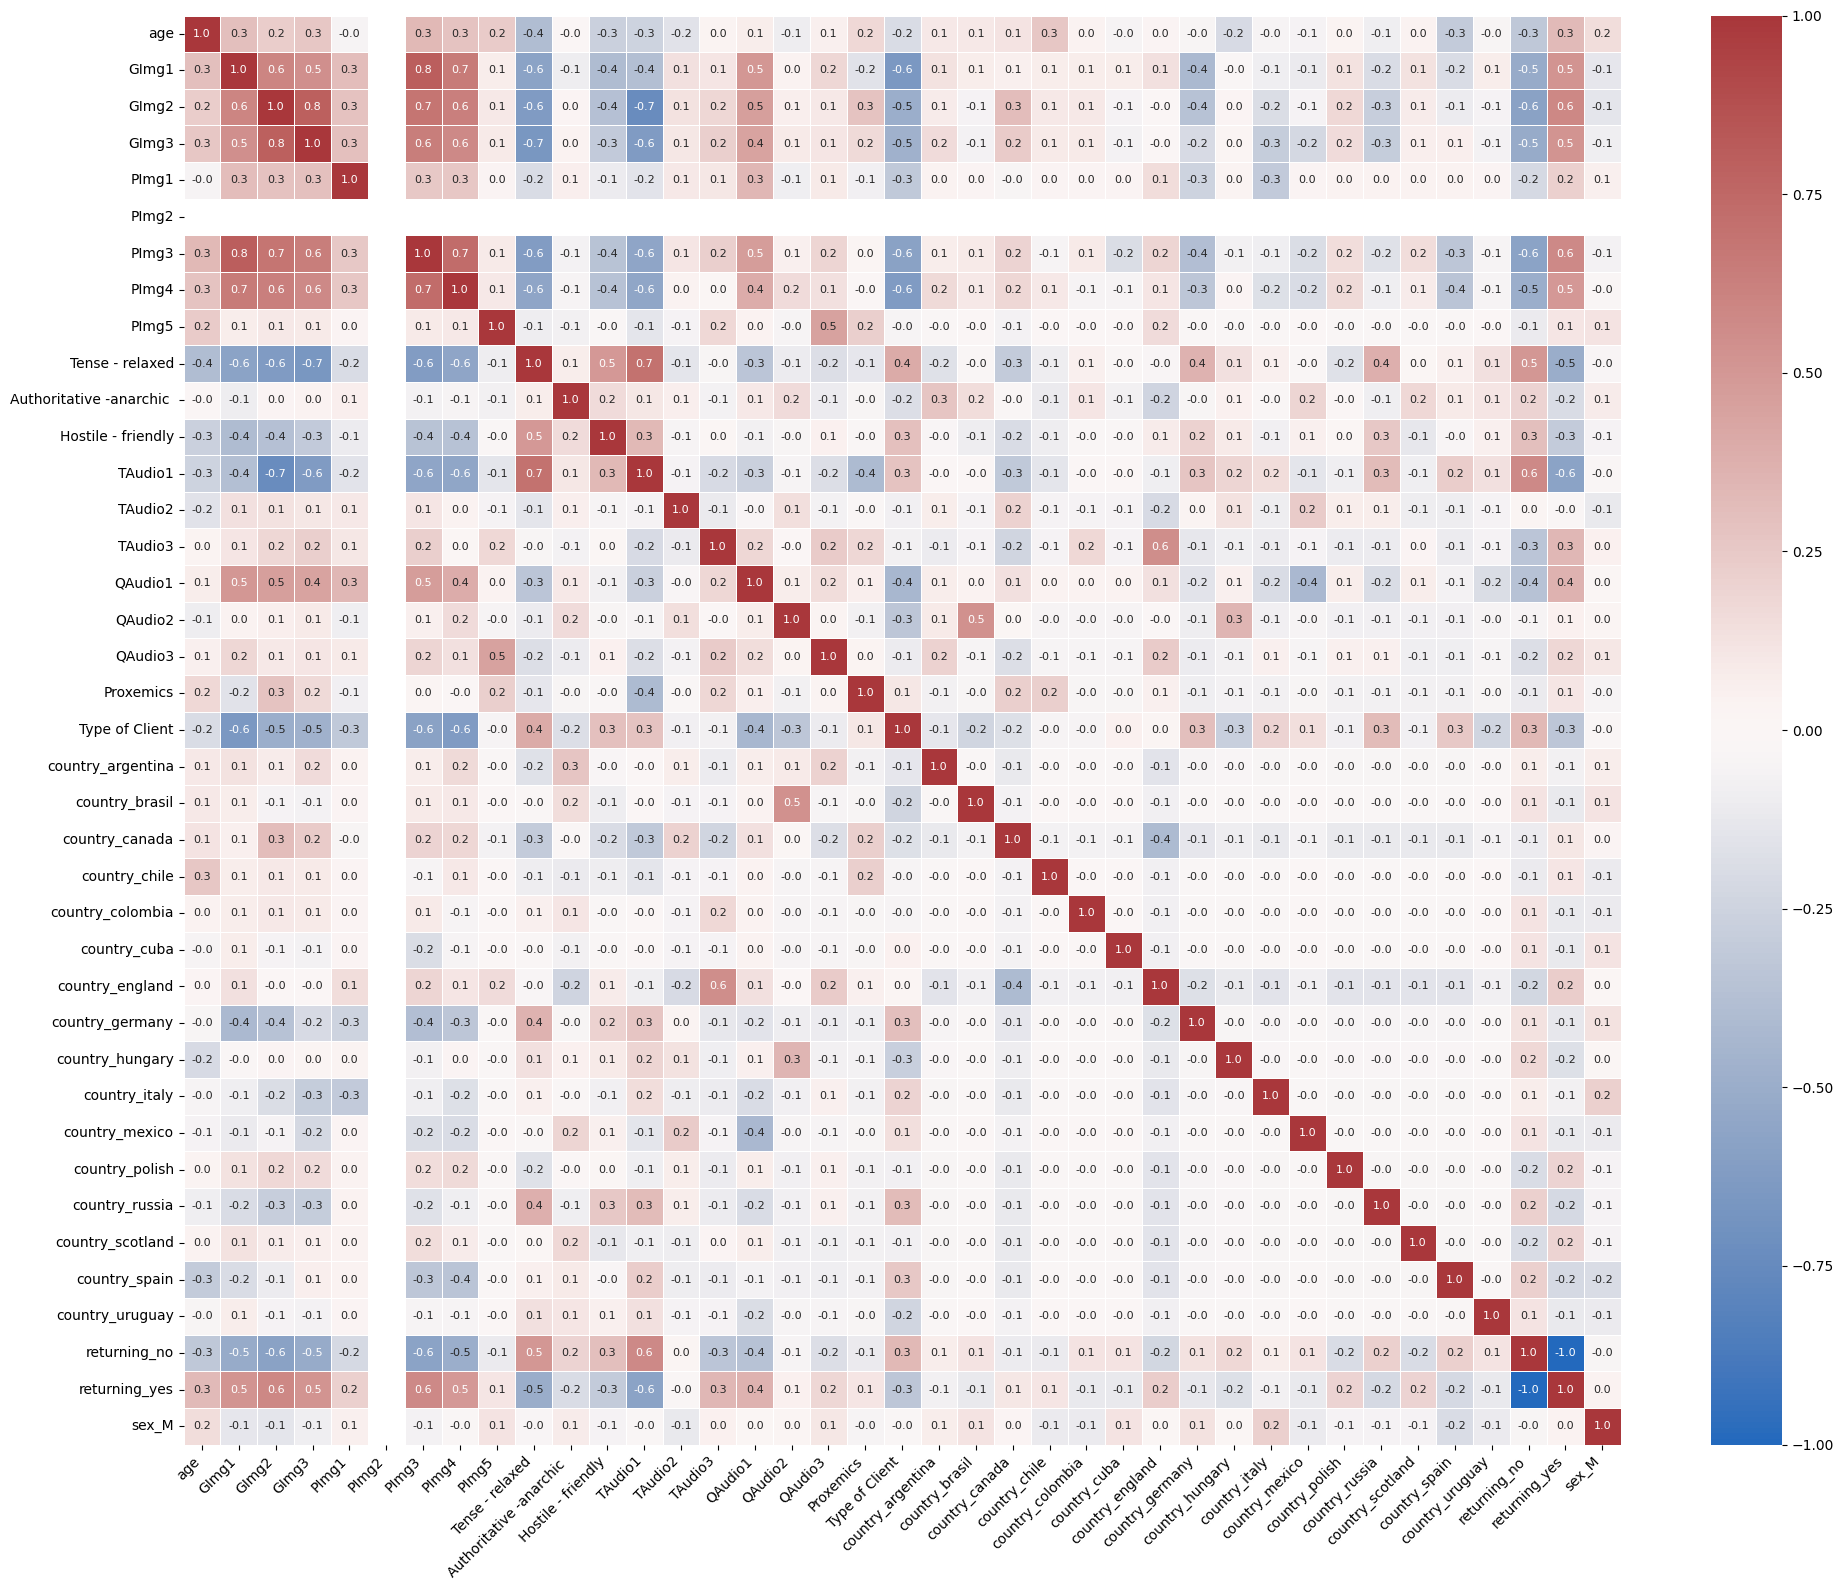

In [ ]:
plt.figure(figsize=(20, 16))
corr = df.corr()

plot = sn.heatmap(
    corr,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cmap="vlag",
    annot_kws={"size": 8}
)

# Rotaciona os nomes das colunas e linhas
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()  # ajusta para não cortar texto
plt.show()


In [ ]:
colunas = [col for col in df.columns if col != 'Type of Client'] + ['Type of Client']
df = df[colunas]

## 🧪 Separação dos Dados em Conjuntos de Treinamento e Teste

Nesta etapa, dividimos o conjunto de dados em duas partes:

- **Treinamento (train):** Usado para treinar o modelo.
- **Teste (test):** Usado para avaliar o desempenho do modelo com dados que ele nunca viu.

A separação é importante para evitar overfitting e garantir que o modelo generalize bem para novos dados.

Utilizamos a função `train_test_split` da biblioteca `sklearn.model_selection`, normalmente com uma proporção de **75% treino / 25% teste** ou similar.


In [ ]:
X = df.drop(columns='Type of Client')
X

,age,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,...,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay,returning_no,returning_yes,sex_M
0,42,2,1,1,2,2,1,1,0,4,...,0,0,0,0,0,0,1,1,0,0
1,60,2,1,1,2,2,2,2,0,2,...,0,0,0,0,0,0,0,1,0,1
2,25,1,1,1,2,2,1,2,0,5,...,0,0,0,0,0,0,0,1,0,0
3,43,2,0,0,2,2,1,1,0,3,...,0,0,0,0,0,0,0,1,0,1
4,30,1,1,1,2,2,1,2,0,3,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,36,1,0,0,2,2,0,1,0,5,...,0,0,0,0,0,0,0,1,0,0
69,38,0,0,0,2,2,0,1,0,5,...,0,0,0,1,0,0,0,1,0,1
70,46,0,1,1,1,2,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
71,39,0,0,2,2,2,0,0,0,5,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
y = df['Type of Client']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


## 🤖 Classificação com k-NN

Nesta etapa, utilizamos o algoritmo **k-Nearest Neighbors (k-NN)** para realizar a classificação. O k-NN é um método baseado na proximidade entre os dados, onde a classe de um novo exemplo é definida pela maioria dos seus *k* vizinhos mais próximos.

### 🔧 Etapas realizadas:

- Instanciei e treinei o modelo com diferentes valores de `k` (número de vizinhos).
- Avaliamos o desempenho com base em métricas como:
  - **Acurácia**: proporção de acertos do modelo.
  - **Precision e Recall**: úteis quando há classes desbalanceadas.
  - **F1-Score**: média harmônica entre precision e recall, ideal para avaliar o equilíbrio entre eles.
  - **Matriz de confusão**: para visualizar erros de classificação entre as classes.

Essas métricas ajudam a entender não só o quão bem o modelo acerta, mas também **como** ele erra — o que é fundamental para problemas com múltiplas classes ou impacto prático em diferentes tipos de erro.

📌 Testamos diferentes valores de `k` para identificar o melhor desempenho com base nas métricas.


In [ ]:
# Função única para treinar e avaliar o modelo
def train_model(X_train, X_test, y_train, y_test, k=1, verbose=False):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)

    if verbose:
        print(f"Treinando o k-NN com k={k}")
        print(f"Acurácia: {acc:.2f}")
        print(classification_report(y_test, preds))

    return model, preds, acc


In [ ]:
# Loop para testar diferentes valores de K
res_score = []

for k in range(1, 31):
    _, _, acc = train_model(X_train_scaled, X_test_scaled, y_train, y_test, k)
    res_score.append(acc)
# Melhor K
melhor_k = res_score.index(max(res_score)) + 1
print(f"\nMelhor K: {melhor_k} com acurácia de {max(res_score):.2f}")


Melhor K: 4 com acurácia de 0.79


In [ ]:
clf4 = KNeighborsClassifier(n_neighbors=4)

clf4.fit(X_train_scaled, y_train)
y_pred = clf4.predict(X_test_scaled)

score_k4 = clf4.score(X_test_scaled, y_test)
score_k4

0.7894736842105263

In [ ]:
# Treinamento final com melhor K
modelo_final, y_pred, _ = train_model(X_train_scaled, X_test_scaled, y_train, y_test, melhor_k, verbose=True)

Treinando o k-NN com k=4
Acurácia: 0.79
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.86      1.00      0.92        12
           3       0.50      0.33      0.40         3
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1

    accuracy                           0.79        19
   macro avg       0.40      0.47      0.42        19
weighted avg       0.69      0.79      0.73        19



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


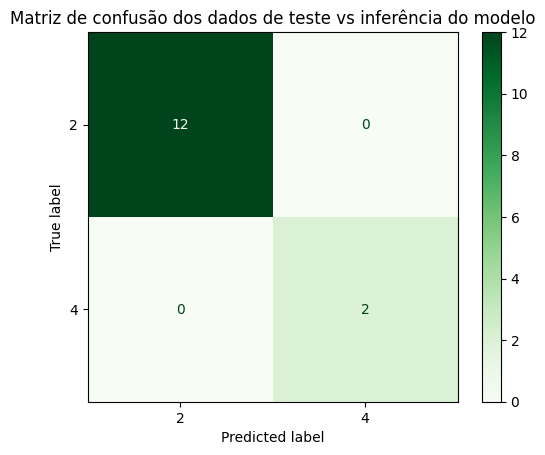

In [ ]:
# Define manualmente os rótulos que você quer exibir
labels = [2, 4]

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Exibindo a matriz de confusão filtrada
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Greens)  # Definindo a cor do gráfico
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()


In [ ]:
# Criação do modelo com o melhor K que você achou antes
model = KNeighborsClassifier(n_neighbors=melhor_k)

# Cross-validation com 5 folds (você pode usar 10 também)
scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy')

print("Acurácias por fold:", scores)
print("Acurácia média:", np.mean(scores))
print("Desvio padrão:", np.std(scores))


Acurácias por fold: [0.66666667 0.66666667 0.66666667]
Acurácia média: 0.6666666666666666
Desvio padrão: 0.0


Otimizar o valor de K
- Ache o melhor valor de k para o algoritmo k-NN. Utilize o intervalo de 1 a 30.

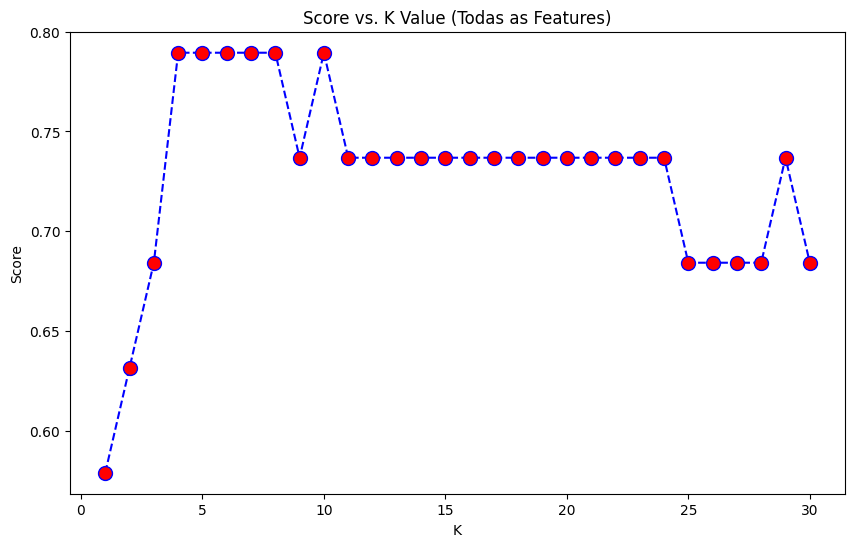

In [ ]:
#Visualização gráfica do Score vs K (Escolha do melhor K)

plt.figure(figsize=(10,6))
plt.plot(range(1,31),res_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Score vs. K Value (Todas as Features)')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

Exiba a média dos resultados obtidos do experimento anterior

In [ ]:
sum(res_score)/len(res_score)

0.7280701754385966

### **Random Forest**

Instancie e treine a Random Forest com os parâmetros default do algoritmo. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
# Lista de hiperparâmetros para testar
n_estimators_list = [10, 20, 50, 100, 200]
max_depth_list = [None, 5, 10, 20]

# Armazena os melhores resultados
melhor_acuracia = -1
melhores_parametros = {}
melhor_y_pred = None

print("Testando combinações de hiperparâmetros...\n")

for n in n_estimators_list:
    for depth in max_depth_list:
        clf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"n_estimators={n}, max_depth={depth}, Acurácia: {acc:.4f}")

        # Atualiza o melhor resultado
        if acc > melhor_acuracia:
            melhor_acuracia = acc
            melhores_parametros = {"n_estimators": n, "max_depth": depth}
            melhor_y_pred = y_pred  # Aqui salva o melhor y_pred

print("\nMelhor combinação:")
print(f"Acurácia: {melhor_acuracia:.4f}")
print(f"Parâmetros: {melhores_parametros}")


Testando combinações de hiperparâmetros...

n_estimators=10, max_depth=None, Acurácia: 0.7368
n_estimators=10, max_depth=5, Acurácia: 0.7895
n_estimators=10, max_depth=10, Acurácia: 0.7368
n_estimators=10, max_depth=20, Acurácia: 0.7368
n_estimators=20, max_depth=None, Acurácia: 0.7895
n_estimators=20, max_depth=5, Acurácia: 0.7368
n_estimators=20, max_depth=10, Acurácia: 0.7895
n_estimators=20, max_depth=20, Acurácia: 0.7895
n_estimators=50, max_depth=None, Acurácia: 0.7368
n_estimators=50, max_depth=5, Acurácia: 0.7368
n_estimators=50, max_depth=10, Acurácia: 0.7368
n_estimators=50, max_depth=20, Acurácia: 0.7368
n_estimators=100, max_depth=None, Acurácia: 0.7895
n_estimators=100, max_depth=5, Acurácia: 0.7368
n_estimators=100, max_depth=10, Acurácia: 0.7895
n_estimators=100, max_depth=20, Acurácia: 0.7895
n_estimators=200, max_depth=None, Acurácia: 0.7895
n_estimators=200, max_depth=5, Acurácia: 0.8421
n_estimators=200, max_depth=10, Acurácia: 0.7895
n_estimators=200, max_depth=20, 

Exiba as métricas do Classification Report para o modelo Random Forest

In [ ]:
# Exibir o relatório com o melhor modelo
print("\nRelatório de Classificação do Melhor Modelo:")
print(classification_report(y_test, melhor_y_pred))


Relatório de Classificação do Melhor Modelo:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.92      1.00      0.96        12
           3       1.00      0.67      0.80         3
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.84        19
   macro avg       0.48      0.53      0.49        19
weighted avg       0.79      0.84      0.80        19



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plote a matriz de confusão.

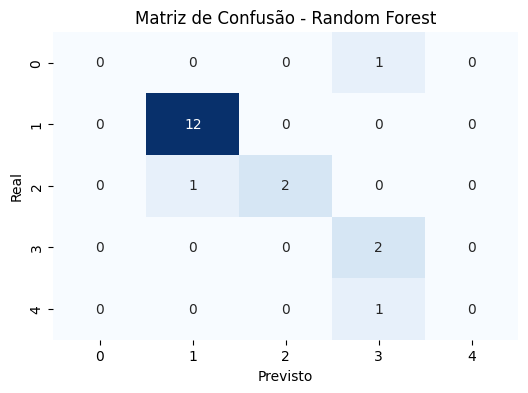

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, melhor_y_pred)

# Plot
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

## Grid Search

Faça um grid search dos parâmetros da **Random Forest**:
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
4. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Links de referência:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
2. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# 1. Define os hiperparâmetros e seus possíveis valores
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 2. Instancia o modelo com class_weight para lidar com desbalanceamento
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 3. Usa StratifiedKFold para melhor dividir classes desbalanceadas
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 4. Configura o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=150,
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 5. Executa o ajuste
random_search.fit(X_train, y_train)

# 6. Melhor modelo encontrado
best_model = random_search.best_estimator_

# 7. Previsões no conjunto de teste
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 150 candidates, totalling 450 fits


Melhores parâmetros encontrados:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Acurácia média da validação cruzada (cv): 0.8333
Acurácia no conjunto de teste: 0.7368

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.92      0.92      0.92        12
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         2
           5       0.33      1.00      0.50         1

    accuracy                           0.74        19
   macro avg       0.55      0.65      0.56        19
weighted avg       0.73      0.74      0.72        19



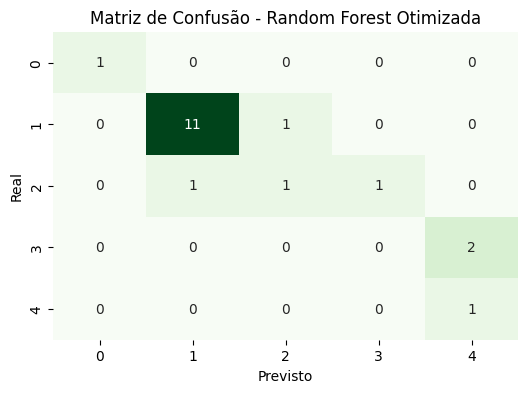

In [ ]:
# 8. Resultados
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

print(f"\nAcurácia média da validação cruzada (cv): {random_search.best_score_:.4f}")
print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred):.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# 9. Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest Otimizada')
plt.show()

In [ ]:
clf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False,
    random_state=42  # essencial!
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Melhor Acurácia: {acc:.4f}")


Melhor Acurácia: 0.7895


Exiba a média dos resultados obtidos do experimento anterior

In [ ]:
# Converte os resultados para DataFrame
resultados = pd.DataFrame(random_search.cv_results_)

# Mostra as principais colunas: média da acurácia e os parâmetros usados
media_resultados = resultados[['mean_test_score', 'std_test_score', 'params']]

# Ordena do melhor para o pior
media_resultados = media_resultados.sort_values(by='mean_test_score', ascending=False)

# Exibe os 10 melhores resultados
pd.set_option('display.max_colwidth', None)  # Para mostrar todos os parâmetros sem cortar
print(media_resultados.head(10))


     mean_test_score  std_test_score  \
49          0.833333        0.045361   
47          0.833333        0.045361   
44          0.833333        0.045361   
27          0.833333        0.045361   
29          0.833333        0.045361   
28          0.833333        0.045361   
142         0.833333        0.045361   
110         0.833333        0.045361   
112         0.833333        0.045361   
102         0.833333        0.045361   

                                                                                                                                   params  
49    {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}  
47     {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}  
44      {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}  

In [ ]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
random_search.best_score_

np.float64(0.8333333333333334)

## Conclusão

## 🧾 Conclusão Geral do Projeto de Classificação

### 🔹 k-Nearest Neighbors (k-NN)

O modelo **k-NN** foi testado com valores de `k` variando de 1 a 30. A melhor configuração foi com **k = 4**, alcançando:

- **Acurácia no teste:** **0.79**
- **Acurácia média geral dos testes com diferentes valores de k:** **72,8%**
- **Acurácia média da validação cruzada (3 folds):** **66,7%** com desvio padrão **0.0**

🔍 **Desempenho por classe**:
- Excelente desempenho na **classe 2**, com recall de **100%**
- No entanto, **falhou totalmente** em prever as classes 0 e 5 (precision e recall igual a 0)
- **f1-score macro:** **0.42**, indicando desequilíbrio no desempenho entre classes

⚠️ Isso mostra que o k-NN, apesar da acurácia razoável, tem dificuldade com classes minoritárias, resultado comum em datasets desbalanceados.

---

### 🔹 Random Forest

Diversas combinações de hiperparâmetros foram testadas, sendo que a melhor performance foi obtida com:

```python
'n_estimators': 200,
'max_depth': 5
```

- **Melhor acurácia no teste:** **0.84**
- **Melhor acurácia média da validação cruzada:** **83,3%**, com **desvio padrão: 4,5%**
- **Acurácia no teste final com melhores hiperparâmetros:** **0.74**

📊 **Relatório de classificação (melhor modelo):**
- Classe 2: F1-score de **0.96** (alta performance)
- Classes 3 e 4: Desempenho intermediário
- Classes 0 e 5: Baixo desempenho, com recall **0.00** para a classe 4 e **precision 0.00** para a classe 5

📉 **f1-score macro médio:** **0.49**, ainda mostrando impacto do desbalanceamento de classes

📌 Mesmo com esse desafio, o Random Forest demonstrou **mais robustez** que o k-NN, especialmente após o ajuste de hiperparâmetros.

---

## ✅ Considerações Finais

- **Random Forest superou o k-NN em acurácia geral, validação cruzada e robustez**, sendo o modelo mais indicado neste cenário.
- Ambos os modelos sofrem com **desbalanceamento de classes**, o que prejudica a capacidade de generalização para categorias com poucos exemplos.

